## 140 - S3 Radar Archive Data

[Youtube](https://www.youtube.com/watch?v=a2qAYVPRfrc)

In [1]:
from datetime import datetime
import boto3
import botocore
from botocore.client import Config

In [7]:
s3 = boto3.resource('s3', config = Config(signature_version = botocore.UNSIGNED, user_agent_extra = 'Resource'))
bucket = s3.Bucket('noaa-nexrad-level2')

In [8]:
d = datetime(2020, 4, 22, 10)

station = 'KTLX'

prefix = f'{d:%Y}/{d:%m}/{d:%d}/{station}/{station}{d:%Y%m%d_%H}'
print(prefix)

2020/04/22/KTLX/KTLX20200422_10


In [10]:
objects = []
for obj in bucket.objects.filter(Prefix = prefix):
    print(obj.key)
    objects.append(obj)

2020/04/22/KTLX/KTLX20200422_100223_V06
2020/04/22/KTLX/KTLX20200422_100648_V06
2020/04/22/KTLX/KTLX20200422_101124_V06
2020/04/22/KTLX/KTLX20200422_101615_V06
2020/04/22/KTLX/KTLX20200422_102106_V06
2020/04/22/KTLX/KTLX20200422_102557_V06
2020/04/22/KTLX/KTLX20200422_103048_V06
2020/04/22/KTLX/KTLX20200422_103548_V06
2020/04/22/KTLX/KTLX20200422_104019_V06
2020/04/22/KTLX/KTLX20200422_104510_V06
2020/04/22/KTLX/KTLX20200422_105001_V06
2020/04/22/KTLX/KTLX20200422_105447_V06
2020/04/22/KTLX/KTLX20200422_105933_V06
2020/04/22/KTLX/KTLX20200422_105933_V06_MDM


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from metpy.io import Level2File
from metpy.plots import ctables

In [12]:
f = Level2File(objects[4].get()['Body'])

ref_norm, ref_cmap = ctables.registry.get_with_steps('NWSReflectivity', 5, 5)

sweep = 0

az = np.array([ray[0].az_angle for ray in f.sweeps[sweep]])

ref_hdr = f.sweeps[sweep][0][4][b'REF'][0]
ref_range = np.arange(ref_hdr.num_gates) * ref_hdr.gate_width + ref_hdr.first_gate
ref = np.array([ray[4][b'REF'][1] for ray in f.sweeps[sweep]])

data = np.ma.array(ref)
data[np.isnan(data)] = np.ma.masked

xlocs = ref_range * np.sin(np.deg2rad(az[:, np.newaxis]))
ylocs = ref_range * np.cos(np.deg2rad(az[:, np.newaxis]))

/tmp/ipykernel_613059/3003877572.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(xlocs, ylocs, data, cmap = ref_cmap, norm = ref_norm, shading = 'auto')


(-100.0, 100.0)

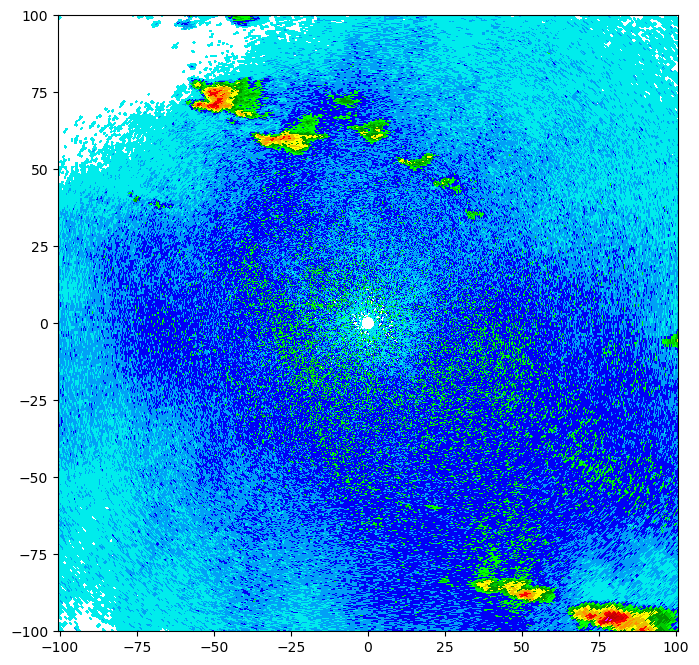

In [13]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.pcolormesh(xlocs, ylocs, data, cmap = ref_cmap, norm = ref_norm, shading = 'auto')
ax.set_aspect('equal', 'datalim')
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)